In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
current_map = "data"
patient = [file for file in os.listdir(current_map)]
print(len(patient))

279


In [5]:
def get_x_coord(path_name):
    structure = path_name.split("_")
    x_name = structure[2]
    return x_name[1:]

def get_y_coord(path_name):
    structure = path_name.split("_")
    x_name = structure[3]
    return x_name[1:]

In [6]:
amount_negative = 0
amount_positive = 0
perc_positive = 0
patient_positive = 0
patient_negative = 0
all_average = []
x_coord = {}
y_coord = {}
enough_neg = []
enough_pos = []

for sub in patient:
    path = f"{current_map}/{sub}"
    for negative in os.listdir(f"{path}/0"):
        amount_negative += 1
        patient_negative += 1
    for positive in os.listdir(f"{path}/1"):
        amount_positive += 1
        patient_positive += 1
        x = get_x_coord(positive)
        y = get_y_coord(positive)
        if not x in x_coord:
            x_coord[x] = 1
        else: x_coord[x] += 1
        if not y in y_coord:
            y_coord[y] = 1
        else: y_coord[y] += 1
    all_average.append(patient_positive / (patient_positive + patient_negative))
    if patient_negative < 11: enough_neg.append(sub)
    if patient_positive < 11: enough_pos.append(sub)
    patient_negative = 0
    patient_positive = 0
    
perc_positive = sum(all_average) / len(all_average)

In [7]:
print(perc_positive)
# print(all_average[10])
print(amount_positive)
print(amount_negative)
print(enough_neg)
print(enough_pos)

0.3080663365028293
78786
198738
[]
['9175']


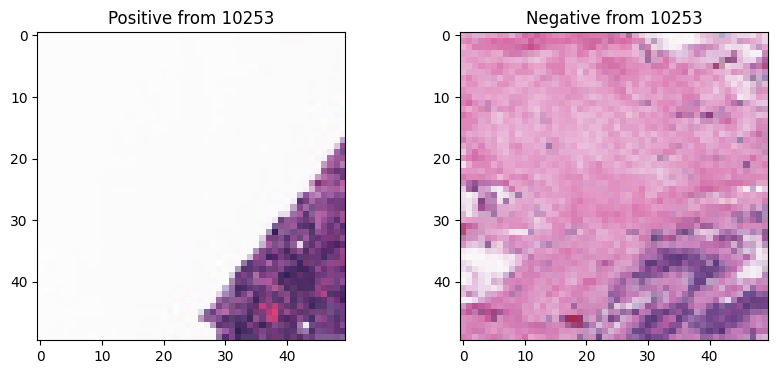

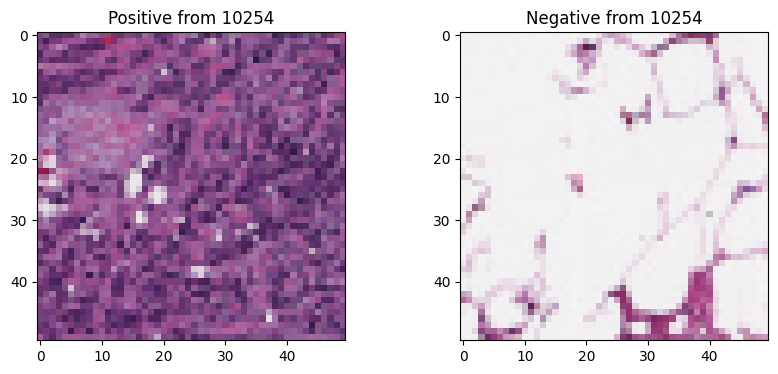

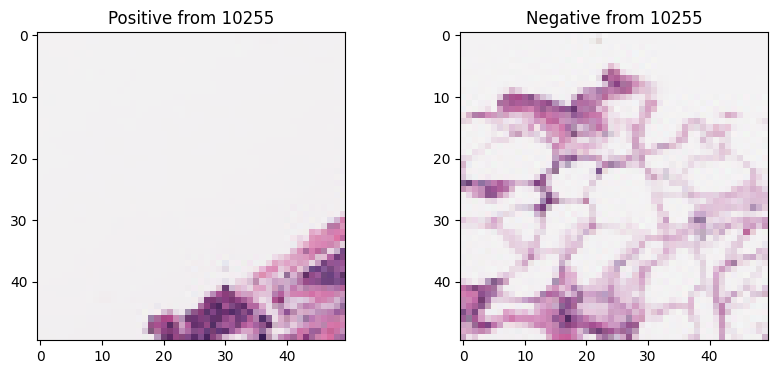

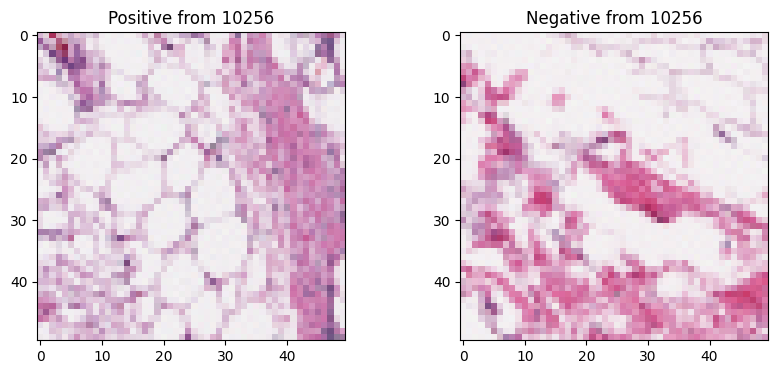

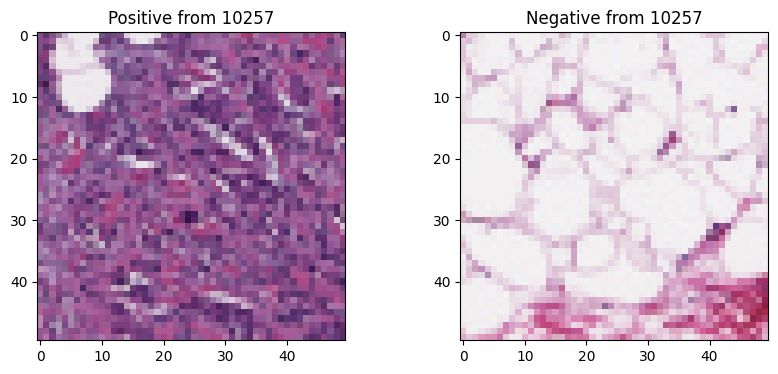

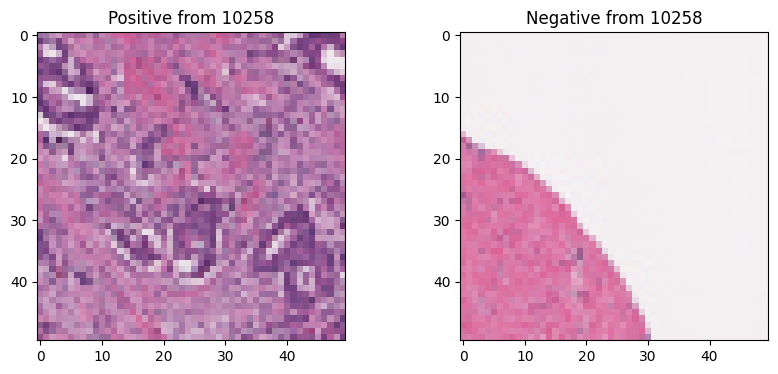

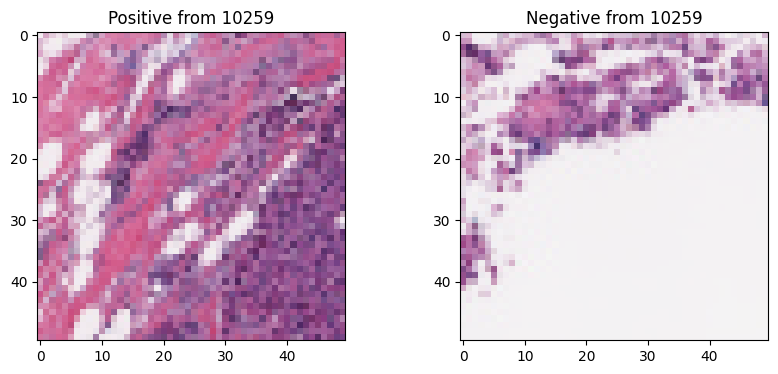

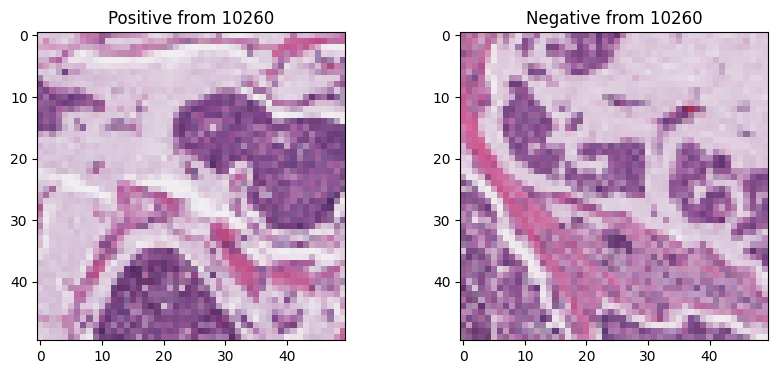

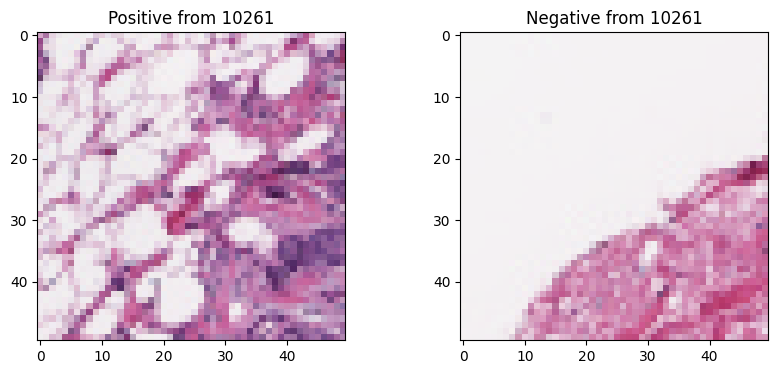

In [9]:
for i in range(0, 9):
    person = patient[i]
    pos_path = f"{current_map}/{person}/1"
    neg_path = f"{current_map}/{person}/0"
    pos_file = f"{pos_path}/{os.listdir(pos_path)[0]}"
    neg_file = f"{neg_path}/{os.listdir(neg_path)[0]}"
    im1 = Image.open(pos_file)
    im2 = Image.open(neg_file)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    # Make the barplot with the predictions
    ax[0].imshow(im1)
    ax[1].imshow(im2)
    # Rotate the x-axis labels by 90 degrees
    ax[0].set_title(f'Positive from {person}')
    ax[1].set_title(f'Negative from {person}')

    plt.show()

- De eerste patiënt betreft patiënt 10253. Links bevat een positief IDC plaatje, wat met name zo lijkt te zijn door de aanwezigheid van de donkere paarse cellen. De verschillende cellen zijn vrijwel gelijk van kleur, op her en der donkerroze gekleurde cellen na. Helaas is op deze afbeelding ook veel ‘achtergrond’ te zien (witte ruimte). Rechts zien we het IDC negatieve plaatje van deze patiënt, hier zien we een veel rustiger beeld, met veelal lichtrozige gekleurde cellen. Rechts onderaan de afbeelding is echter wel een groep met donkere gekleurde cellen te zien, echter zijn deze cellen beduidend minder donker gekleurd dan de cellen op het IDC positieve beeld.
- Vervolgens zien we twee beelden van patiënt 10254. Ook hier beginnen we links met het IDC positieve beeld. Dit beeld laat opnieuw donkerpaars gekleurde cellen zien. Deze cellen lijken iets minder consistent gekleurd, echter geeft dat juist een onrustig beeld. Rechts zien we een IDC negatief beeld van dezelfde patiënt. Hier is echter vrij weinig op te beoordelen, daar dit meer op vetcellen lijken. Hetgeen wel te beoordelen is, is het deel onderaan, daar lijken de cellen diep roze gekleurd in een vrij consistent patroon.
- Daarna volgt patiënt 10255. Hier zijn eigenlijk beide afbeeldingen wat minder goed te beoordelen. Op het linker beeld, IDC positief, zien we maar een klein deel van het weefsel. Dit weefsel heeft veel verschillende kleuren, zowel lichtroze als donkerpaars, waardoor er niet veel over te zeggen valt. Het rechter beeld lijkt opnieuw veel vetweefsel te bevatten, waardoor hier vrij weinig over te zeggen is. De kleur van de cellen lijkt ook hier vrij gevarieerd van lichtroze tot wat donkerder paars.
- Vervolgens patiënt 10257. Het IDC positieve plaatje laat net als bij patiënt 10254 een structureel donkerpaars gekleurd beeld zien met wel wat verschillen in tint. Het IDC negatieve plaatje (rechts) laat opnieuw op vet lijkende cellen zien, waardoor er weinig te zeggen valt over het plaatje.
- Vervolgens komen we bij patiënt 10259. Het IDC positieve plaatje laat een verscheidenheid aan tinten paars en roze zien, met name rechts in de hoek is de kleur heel donkerpaars. Op het IDC negatieve plaatje zien we met name paarse cellen in verschillende tinten. Voor een negatief beeld lijken de kleuren vrij donker.
- Daarna volgt patiënt 10260. Hier lijken het positieve en negatieve beeld best op elkaar. Beide beelden bevatten cellen van lichtroze tot een diep paarse kleur. Wel lijkt het negatieve beeld meer roze te bevatten dan het positieve beeld.
- Tot slot de laatste beelden van patiënt 10261. Hier zien we dit keer bij het positieve beeld op vet lijkende cellen, waardoor dit beeld wat lastiger te beoordelen is. De kleurvariatie in dit beeld lijkt groot, wat een onrustig beeld geeft. In het IDC negatieve beeld (rechts) zien we een vrij rustig ogend weefsel, doordat er structureel lichtroze gekleurde cellen te zien zijn.


In [ ]:
im3 = Image.open("idc_regular/9176/1/9176_idx5_x1101_y1801_class1.png")
im3.size